# Introduction

The following is some analysis of some satisfaction surveys taken from customers of an Airline. I used a KNN model for predictions due to the sample size. I also attempted to use PCA analysis to determine which of the variables was a greater factor for the customer satisfaction. 

### 1. Exploratory Data Analysis

### 2. Data Cleaning

### 3. PCA Analysis

### 4. K Nearest Neighbours Classification


In [2]:
# Data wrangling
import pandas as pd
import numpy as np
# Data Visualisation
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
# Metrics
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
# Machine Learning Models
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
#FutureWarnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

### 1. Exploratory Data Analysis

Over 100,000 records in the training data. Mostly integer fields but some objects. Noticing there are some null values in the 'Arrival Delay in Minutes' field.

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

Also null values in test data.

In [4]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25976 entries, 0 to 25975
Data columns (total 25 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Unnamed: 0                         25976 non-null  int64  
 1   id                                 25976 non-null  int64  
 2   Gender                             25976 non-null  object 
 3   Customer Type                      25976 non-null  object 
 4   Age                                25976 non-null  int64  
 5   Type of Travel                     25976 non-null  object 
 6   Class                              25976 non-null  object 
 7   Flight Distance                    25976 non-null  int64  
 8   Inflight wifi service              25976 non-null  int64  
 9   Departure/Arrival time convenient  25976 non-null  int64  
 10  Ease of Online booking             25976 non-null  int64  
 11  Gate location                      25976 non-null  int

In [5]:
train.describe()

,Unnamed: 0,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103594.000000
mean,51951.500000,64924.210502,39.379706,1189.448375,2.729683,3.060296,2.756901,2.976883,3.202129,3.250375,3.439396,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,14.815618,15.178678
std,29994.645522,37463.812252,15.114964,997.147281,1.327829,1.525075,1.398929,1.277621,1.329533,1.349509,1.319088,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.230901,38.698682
min,0.000000,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25975.750000,32533.750000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,51951.500000,64856.500000,40.000000,843.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,77927.250000,97368.250000,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,103903.000000,129880.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


Dropped the ID fields

In [6]:
train.drop(train.iloc[:,[0,1]], axis=1, inplace=True)
test.drop(test.iloc[:,[0,1]], axis=1, inplace=True)

<Axes: xlabel='Age', ylabel='Count'>

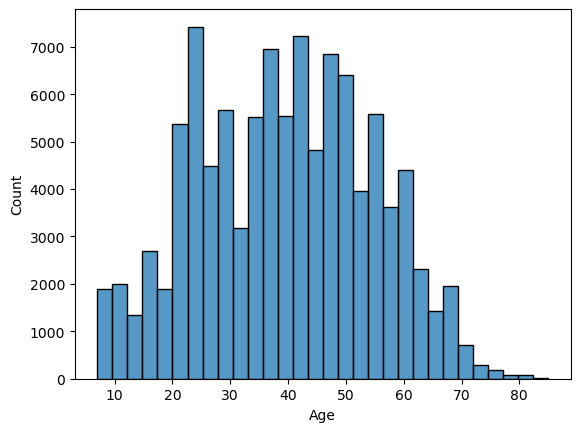

In [7]:
sns.histplot(train, x='Age', bins=30)

<Axes: xlabel='Flight Distance', ylabel='Count'>

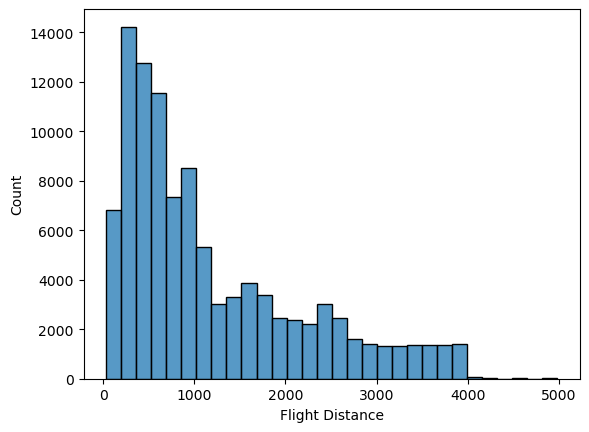

In [8]:
sns.histplot(train, x='Flight Distance', bins=30)

<Axes: xlabel='Departure Delay in Minutes', ylabel='Count'>

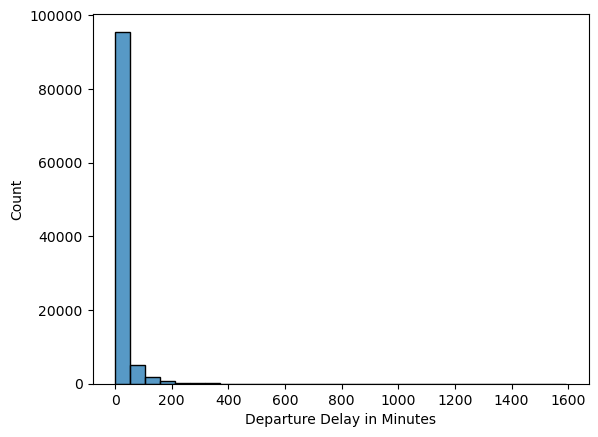

In [9]:
sns.histplot(train, x='Departure Delay in Minutes', bins=30)

Distribution of the Arrival delays looks very similar to the Departure delays. It would make sense if the delay in taking off also equals the delay in landing. 

<Axes: xlabel='Arrival Delay in Minutes', ylabel='Count'>

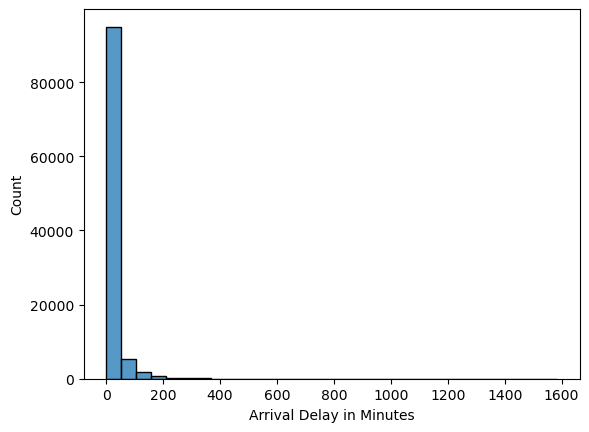

In [10]:
sns.histplot(train, x='Arrival Delay in Minutes', bins=30)

Correlating the object fields does show the delays are very correlated, will drop one of the fields. 

<Axes: >

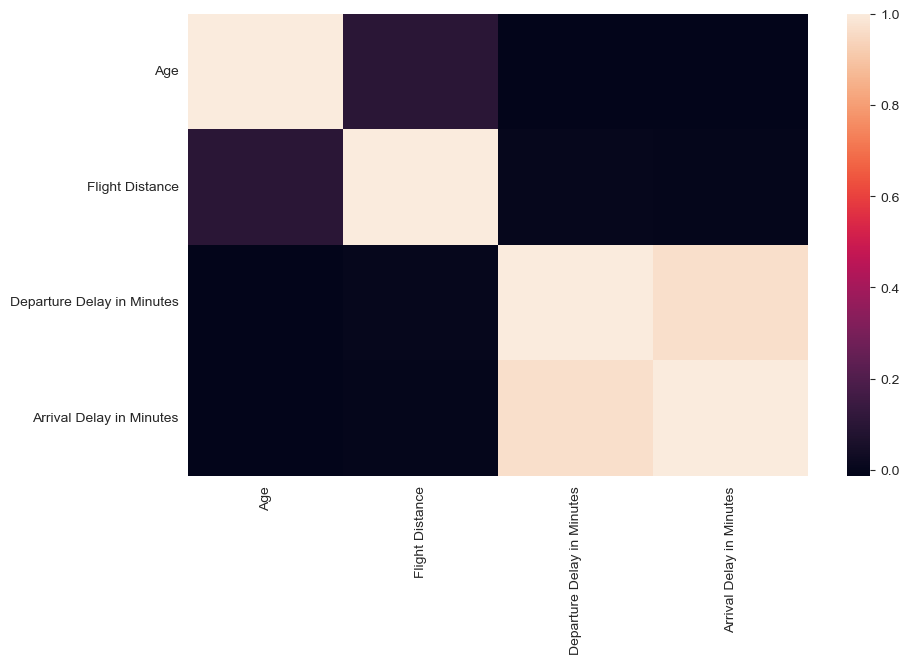

In [11]:
train_corr = train[['Age', 'Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']].corr()

sns.axes_style('white')
sns.set_style('whitegrid')
plt.figure(figsize= (10, 6))
sns.heatmap(train_corr)

In [12]:
train.drop('Departure Delay in Minutes', axis=1, inplace=True)
test.drop('Departure Delay in Minutes', axis=1, inplace=True)

Analysis of the countplots.
###### Equal Genders
###### Most customers are loyal and in the business class or eco class. 

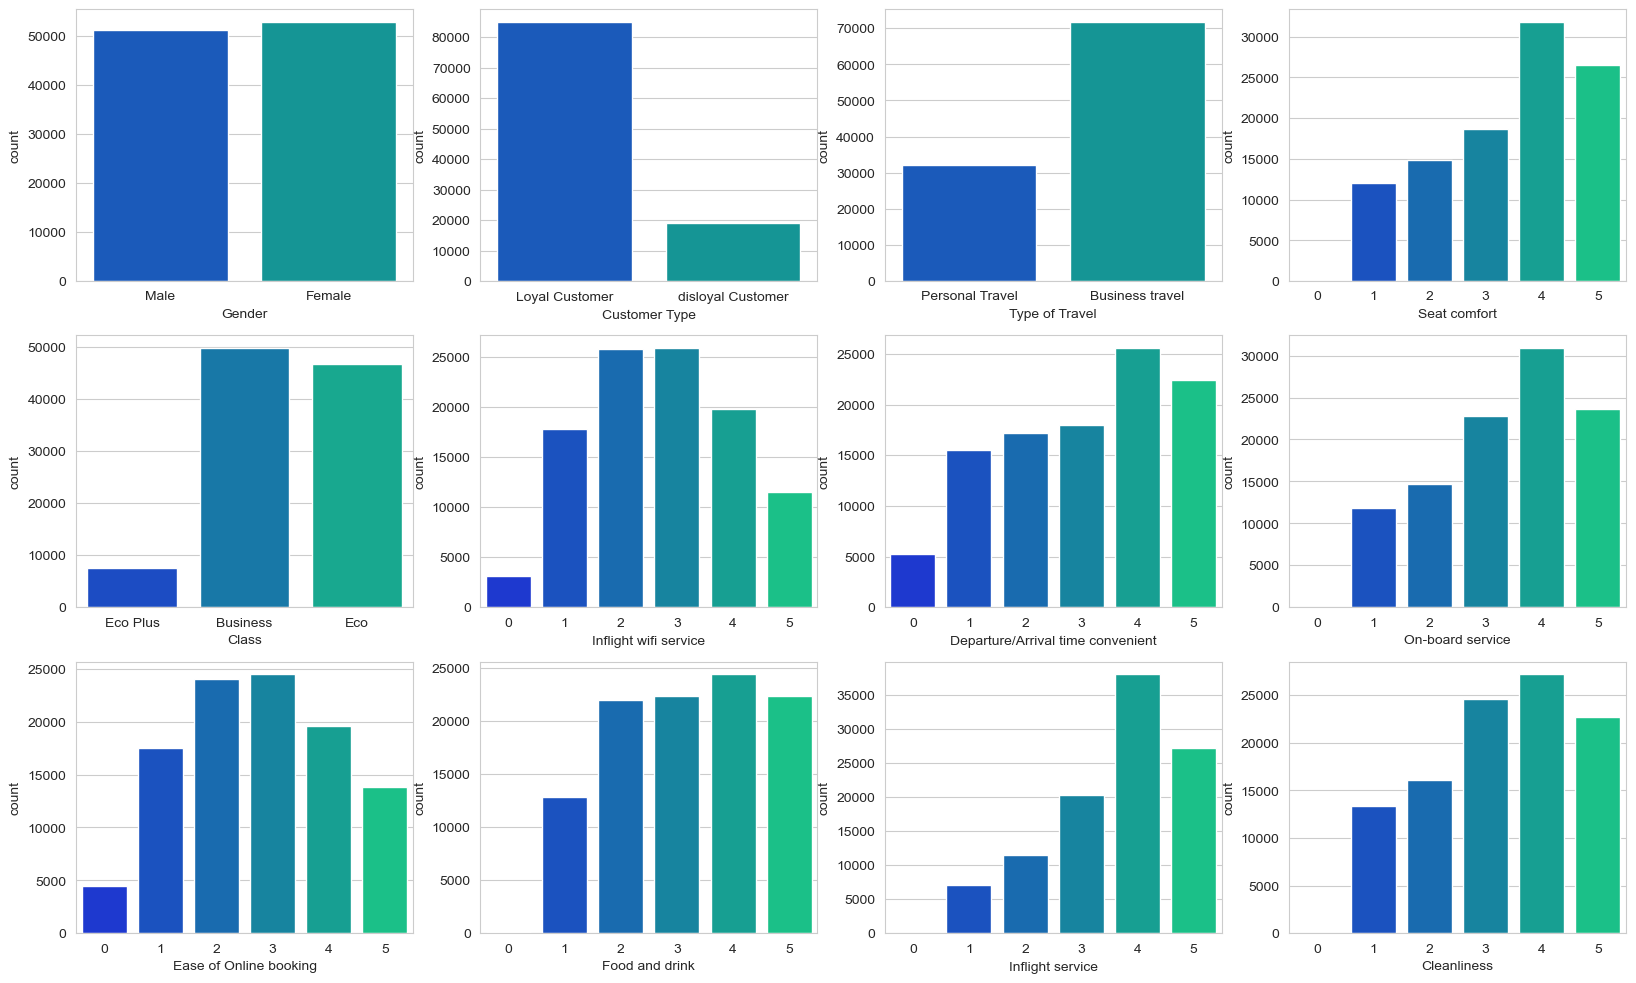

In [13]:
fig, axes = plt.subplots(3, 4, figsize = (20, 12))
sns.countplot(x = 'Gender', data = train, palette= 'winter', ax = axes[0, 0]);
sns.countplot(x = 'Customer Type', data = train, palette= 'winter', ax = axes[0, 1]);
sns.countplot(x = 'Type of Travel', data = train, palette= 'winter', ax = axes[0, 2]);
sns.countplot(x = 'Seat comfort', data = train, palette= 'winter', ax = axes[0, 3]);
sns.countplot(x = 'Class', data = train, palette= 'winter', ax = axes[1, 0]);
sns.countplot(x = 'Inflight wifi service', data = train, palette= 'winter', ax = axes[1, 1]);
sns.countplot(x = 'Departure/Arrival time convenient', data = train, palette= 'winter', ax = axes[1, 2]);
sns.countplot(x = 'On-board service', data = train, palette= 'winter', ax = axes[1, 3]);
sns.countplot(x = 'Ease of Online booking', data = train, palette= 'winter', ax = axes[2, 0]);
sns.countplot(x = 'Food and drink', data = train, palette= 'winter', ax = axes[2, 1]);
sns.countplot(x = 'Inflight service', data = train, palette= 'winter', ax = axes[2, 2]);
sns.countplot(x = 'Cleanliness', data = train, palette= 'winter', ax = axes[2, 3]);

### 2. Data Cleaning

In [14]:
train['Gender'].value_counts()

Gender
Female    52727
Male      51177
Name: count, dtype: int64

In [15]:
train['Customer Type'].value_counts()

Customer Type
Loyal Customer       84923
disloyal Customer    18981
Name: count, dtype: int64

In [16]:
train['Type of Travel'].value_counts()

Type of Travel
Business travel    71655
Personal Travel    32249
Name: count, dtype: int64

In [17]:
train['Class'].value_counts()

Class
Business    49665
Eco         46745
Eco Plus     7494
Name: count, dtype: int64

Mapping the string fields to numeric values.

In [18]:
train['Gender'] = train['Gender'].map({'Male': 1, 'Female': 0})
train['Customer Type'] = train['Customer Type'].map({'Loyal Customer': 1, 'disloyal Customer': 0})
train['Type of Travel'] = train['Type of Travel'].map({'Business travel': 1, 'Personal Travel': 0})
train['Class'] = train['Class'].map({'Business': 2, 'Eco': 1, 'Eco Plus': 0})

In [19]:
print(train['Gender'].value_counts())
print('-'*40)
print(train['Customer Type'].value_counts())
print('-'*40)
print(train['Type of Travel'].value_counts())
print('-'*40)
print(train['Class'].value_counts())

Gender
0    52727
1    51177
Name: count, dtype: int64
----------------------------------------
Customer Type
1    84923
0    18981
Name: count, dtype: int64
----------------------------------------
Type of Travel
1    71655
0    32249
Name: count, dtype: int64
----------------------------------------
Class
2    49665
1    46745
0     7494
Name: count, dtype: int64


In [20]:
test['Gender'] = test['Gender'].map({'Male': 1, 'Female': 0})
test['Customer Type'] = test['Customer Type'].map({'Loyal Customer': 1, 'disloyal Customer': 0})
test['Type of Travel'] = test['Type of Travel'].map({'Business travel': 1, 'Personal Travel': 0})
test['Class'] = test['Class'].map({'Business': 2, 'Eco': 1, 'Eco Plus': 0})

In [21]:
print(test['Gender'].value_counts())
print('-'*40)
print(test['Customer Type'].value_counts())
print('-'*40)
print(test['Type of Travel'].value_counts())
print('-'*40)
print(test['Class'].value_counts())

Gender
0    13172
1    12804
Name: count, dtype: int64
----------------------------------------
Customer Type
1    21177
0     4799
Name: count, dtype: int64
----------------------------------------
Type of Travel
1    18038
0     7938
Name: count, dtype: int64
----------------------------------------
Class
2    12495
1    11564
0     1917
Name: count, dtype: int64


In [22]:
satisfaction = train['satisfaction'].map(lambda x: 1 if x == "satisfied" else 0)

<Axes: >

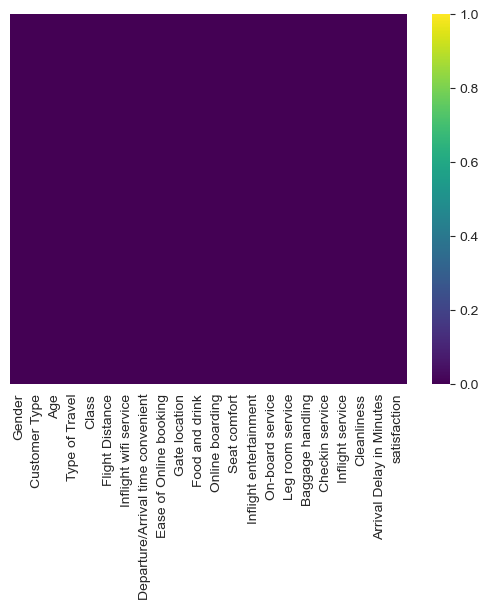

In [23]:
sns.heatmap(train.isnull(), yticklabels=False, cmap='viridis')

Filled in null values for the arrival delay. Realised it was better to have dropped the arrival delay now instead of the departure delay as there weren't null values. At least this shows an interesting step in data cleaning. 

In [24]:
median_arrival_delay = train['Arrival Delay in Minutes'].median()

train['Arrival Delay in Minutes'] = train['Arrival Delay in Minutes'].fillna(median_arrival_delay)
test['Arrival Delay in Minutes'] = test['Arrival Delay in Minutes'].fillna(median_arrival_delay)

In [25]:
train['Arrival Delay in Minutes'] = np.log1p(train['Arrival Delay in Minutes'])
test['Arrival Delay in Minutes'] = np.log1p(test['Arrival Delay in Minutes'])

No more null values

<Axes: >

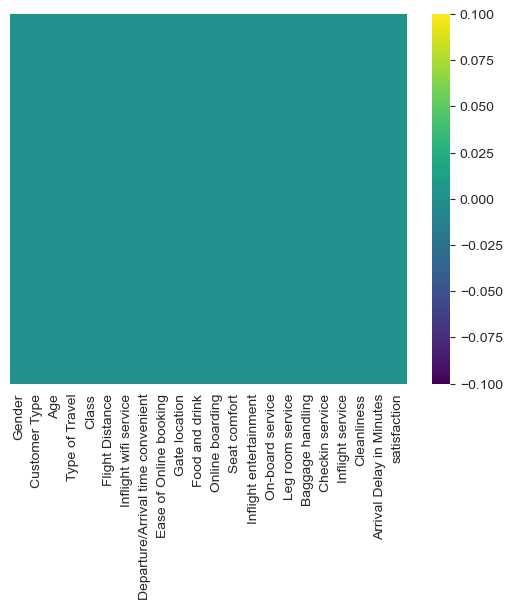

In [26]:
sns.heatmap(train.isnull(), yticklabels=False, cmap='viridis')

### 3. PCA Analysis
The numeric values need to be scaled and then fit to the PCA model. I will show the 2,3 and 4 component analysis and we can see which fields are the most important to the components and therefore, the customers satisfaction. 

In [27]:
train_PCA = train.drop('satisfaction', axis=1)

[[-7.97528386e-03 -8.63367773e-02 -8.48958888e-02 -1.35932417e-01
  -2.14890627e-01 -1.57322439e-01 -2.13225538e-01 -7.53928998e-02
  -1.56716558e-01 -5.53543249e-02 -2.80983677e-01 -2.94800094e-01
  -3.35764030e-01 -4.01194546e-01 -2.65177143e-01 -2.20324233e-01
  -2.40612737e-01 -1.74774073e-01 -2.42733900e-01 -3.31237948e-01
   4.00218118e-02]
 [ 3.17611038e-04 -6.05134416e-02 -2.03885512e-02  6.06148795e-02
   7.84420821e-02  3.96274544e-02 -4.52637233e-01 -4.38608630e-01
  -5.31135114e-01 -4.30798333e-01  1.23174966e-01 -1.54848420e-01
   1.24069661e-01  1.55713423e-01  7.99841249e-02  3.00409074e-02
   7.06409993e-02  4.84581087e-02  7.64574086e-02  1.42417733e-01
  -4.25504549e-03]]


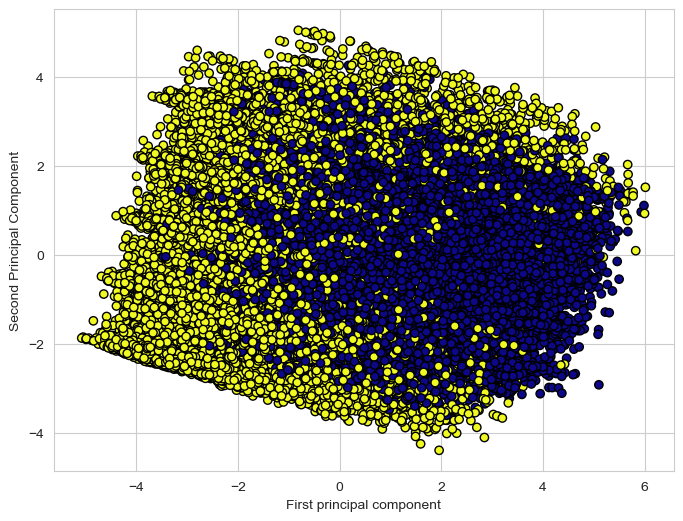

In [28]:
scaler = StandardScaler()
scaler.fit(train_PCA)
scaled_data = scaler.transform(train_PCA)

pca = PCA(n_components=2)
pca.fit(scaled_data)
x_pca = pca.transform(scaled_data)

plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1],c=satisfaction, cmap='plasma', edgecolors='black')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

print(pca.components_)

### 2 Component Analysis

The brighter colours on principle component 1 indicate that most of the on board facilites and cleanliness had the greater impact on satisfaction. In-flight entertainment and Cleanliness seem to be the highest ones. Interestingly, the on board wifi doesn't have much of an impact, maybe passengers don't expect this capability yet. Also the arrival delay doesn't seem to factor much. 

<Axes: >

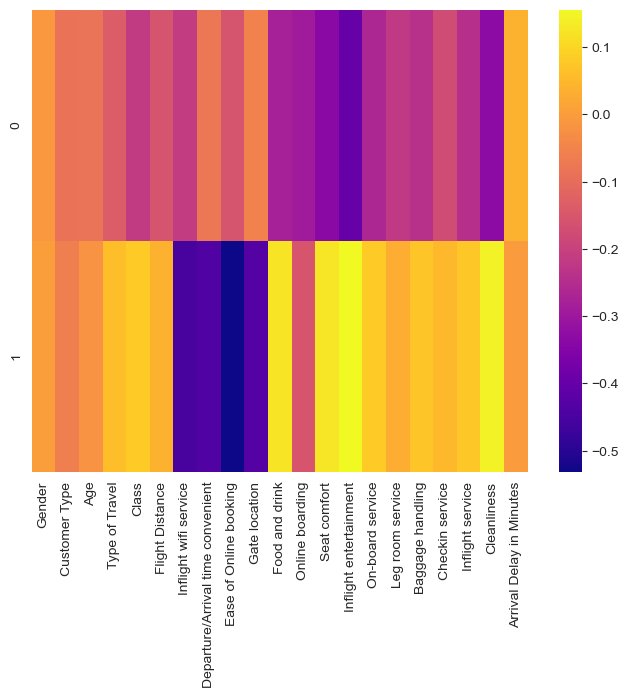

In [29]:
plt.figure(figsize=(8,6))

train_data_comp = pd.DataFrame(pca.components_, columns=train_PCA.columns)

sns.heatmap(train_data_comp, cmap='plasma')

### 3 Component Analysis

The big standouts on Principle component 2 seem to be the food and drink, seat comfort and cleanliness. Could be interpreted that as the majority are business class flyers, these are the things that matter as there is an expectation of certain things happening when catching a flight like delays or the gate location being further away. 

<Axes: >

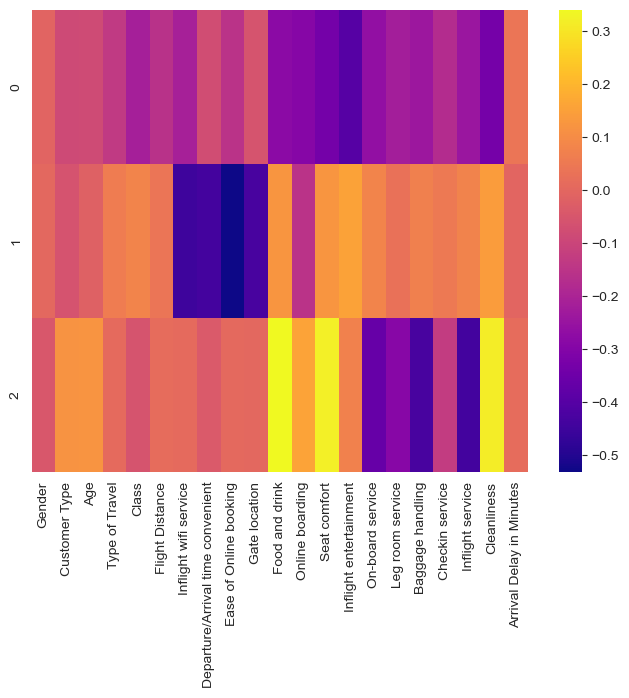

In [30]:
pca = PCA(n_components=3)
pca.fit(scaled_data)
x_pca = pca.transform(scaled_data)

plt.figure(figsize=(8,6))
#plt.scatter(x_pca[:,0],x_pca[:,1],c=satisfaction, cmap='plasma', edgecolors='black')
#plt.xlabel('First principal component')
#plt.ylabel('Second Principal Component')

# print(pca.components_)

train_data_comp = pd.DataFrame(pca.components_, columns=train_PCA.columns)

sns.heatmap(train_data_comp, cmap='plasma')

### 4 Component Analysis

Again food and drink, seat comfort and cleanliness are important factors in principal component 2. The arrival/departure time seems significant in component 3

<Axes: >

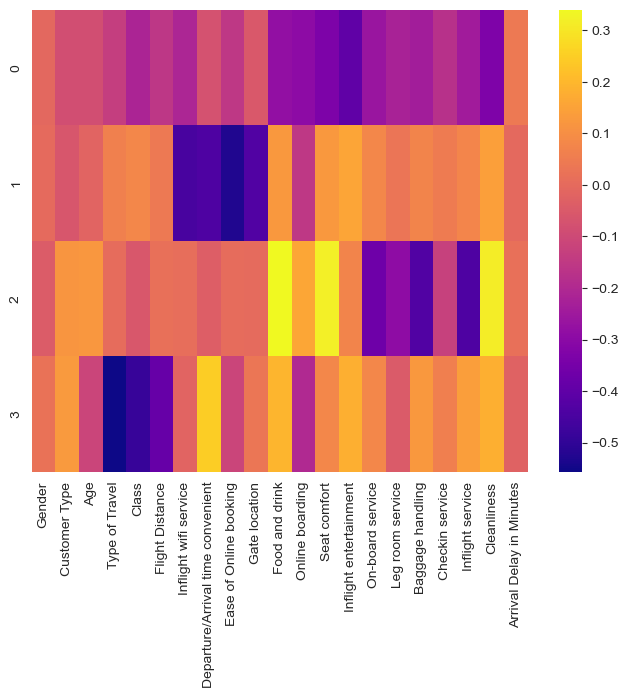

In [31]:
pca = PCA(n_components=4)
pca.fit(scaled_data)
x_pca = pca.transform(scaled_data)

plt.figure(figsize=(8,6))

# print(pca.components_)

train_data_comp = pd.DataFrame(pca.components_, columns=train_PCA.columns)

sns.heatmap(train_data_comp, cmap='plasma')

## 4. K Nearest Neighbours Classification

Need to convert floats to int64 for the KNN.

In [32]:
train['Arrival Delay in Minutes'] = train['Arrival Delay in Minutes'].astype(np.int64)
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 22 columns):
 #   Column                             Non-Null Count   Dtype 
---  ------                             --------------   ----- 
 0   Gender                             103904 non-null  int64 
 1   Customer Type                      103904 non-null  int64 
 2   Age                                103904 non-null  int64 
 3   Type of Travel                     103904 non-null  int64 
 4   Class                              103904 non-null  int64 
 5   Flight Distance                    103904 non-null  int64 
 6   Inflight wifi service              103904 non-null  int64 
 7   Departure/Arrival time convenient  103904 non-null  int64 
 8   Ease of Online booking             103904 non-null  int64 
 9   Gate location                      103904 non-null  int64 
 10  Food and drink                     103904 non-null  int64 
 11  Online boarding                    103904 non-null  

In [33]:
test['Arrival Delay in Minutes'] = test['Arrival Delay in Minutes'].astype(np.int64)
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25976 entries, 0 to 25975
Data columns (total 22 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Gender                             25976 non-null  int64 
 1   Customer Type                      25976 non-null  int64 
 2   Age                                25976 non-null  int64 
 3   Type of Travel                     25976 non-null  int64 
 4   Class                              25976 non-null  int64 
 5   Flight Distance                    25976 non-null  int64 
 6   Inflight wifi service              25976 non-null  int64 
 7   Departure/Arrival time convenient  25976 non-null  int64 
 8   Ease of Online booking             25976 non-null  int64 
 9   Gate location                      25976 non-null  int64 
 10  Food and drink                     25976 non-null  int64 
 11  Online boarding                    25976 non-null  int64 
 12  Seat

<Axes: >

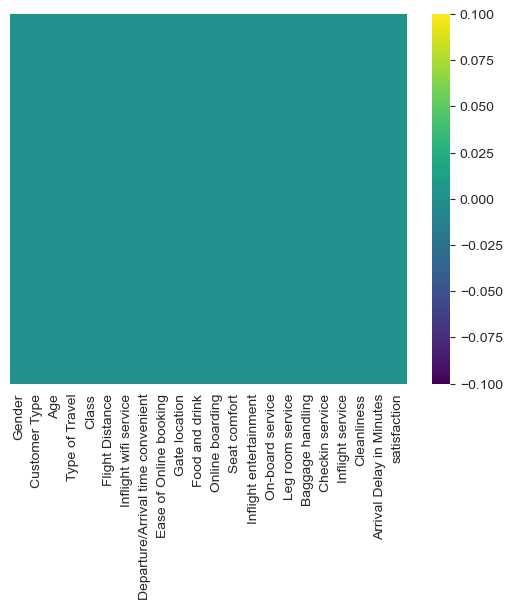

In [34]:
sns.heatmap(test.isnull(), yticklabels=False, cmap='viridis')

In [35]:
X_train = train.drop('satisfaction', axis=1)
y_train = train['satisfaction']

X_test = test.drop('satisfaction', axis=1)
y_test = test['satisfaction']

In [36]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [37]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train_scaled, y_train)

pred = knn.predict(X_test_scaled)

In [38]:
print(confusion_matrix(y_test, pred))

[[13638   935]
 [ 1273 10130]]


Pretty good all around for the model. 90% correct. Now we need to optimise the model for the number of nearest neighbours.

In [39]:
print(classification_report(y_test, pred))

                         precision    recall  f1-score   support

neutral or dissatisfied       0.91      0.94      0.93     14573
              satisfied       0.92      0.89      0.90     11403

               accuracy                           0.91     25976
              macro avg       0.92      0.91      0.91     25976
           weighted avg       0.92      0.91      0.91     25976



In [41]:
error_rate = []
for i in range(1, 16):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train_scaled, y_train)
    pred_i = knn.predict(X_test_scaled)
    error_rate.append(np.mean(pred_i != y_test))

Lowest error rate is at a K Value of 7. 

In [3]:
plt.figure(figsize=(10,6))
plt.plot(range(1,16), error_rate, color='blue', ls='--', marker='o', markerfacecolor='red', markersize=10)
plt.text(4.5, 0.07, round(error_rate[6],5), fontsize = 8)
plt.text(6.5, 0.0695, round(error_rate[8],5), fontsize = 8)
plt.text(8.5, 0.0695, round(error_rate[10],5), fontsize = 8)
plt.title('Error Rate vs K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

NameError: name 'error_rate' is not defined

<Figure size 1000x600 with 0 Axes>

In [43]:
knn2 = KNeighborsClassifier(n_neighbors=9)
knn2.fit(X_train_scaled, y_train)

pred2 = knn2.predict(X_test_scaled)


print(confusion_matrix(y_test, pred2))
print(classification_report(y_test, pred2))

[[14074   499]
 [ 1328 10075]]
                         precision    recall  f1-score   support

neutral or dissatisfied       0.91      0.97      0.94     14573
              satisfied       0.95      0.88      0.92     11403

               accuracy                           0.93     25976
              macro avg       0.93      0.92      0.93     25976
           weighted avg       0.93      0.93      0.93     25976



In [44]:
accuracy = accuracy_score(y_test, pred2)
print(f"Accuracy: {round(accuracy * 100, 2)}%")

Accuracy: 92.97%


Using the KNN model, we have successfully predicted 92.3% of customers satisfaction and as there were relatively even numbers for both outcomes, this worked quite well.  